In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Leads.csv')

In [3]:
df.head()


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## 1. Data Profiling

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

#### Replacing Select with `np.nan`

In [5]:
df = df.replace('Select',np.nan)

In [6]:
df = df.loc[:,df.nunique()!=1]

### 1.1 Exploring the categorical variables

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 32 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Newspaper Article                                   2
X Education Forums          

In [9]:
for column in df.columns:
    value_counts = df[column].value_counts()
    print(column)
    print(value_counts.values)
    print('-----------------------------')

Prospect ID
[1 1 1 ... 1 1 1]
-----------------------------
Lead Number
[1 1 1 ... 1 1 1]
-----------------------------
Lead Origin
[4886 3580  718   55    1]
-----------------------------
Lead Source
[2868 2543 1755 1154  534  142  125   55    6    5    4    2    2    2
    1    1    1    1    1    1    1]
-----------------------------
Do Not Email
[8506  734]
-----------------------------
Do Not Call
[9238    2]
-----------------------------
Converted
[5679 3561]
-----------------------------
TotalVisits
[2189 1680 1306 1120  783  466  395  309  224  164  114   86   48   45
   36   21   18   16   15   12    9    6    6    5    5    5    3    2
    2    2    1    1    1    1    1    1    1    1    1    1    1]
-----------------------------
Total Time Spent on Website
[2193   19   18 ...    1    1    1]
-----------------------------
Page Views Per Visit
[2189 1795 1196  896  651  517  306  244  241  133   94   86   66   60
   59   54   45   43   28   27   25   23   21   19   18   16   

In [10]:
columns_to_drop = ['Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Tags','Country','City','Do Not Call']

In [11]:
df = df.drop(columns=columns_to_drop)

#### Do not Email

In [12]:
value_counts = df['Do Not Email'].value_counts()
values_to_remove = value_counts[value_counts<10]
value_counts

No     8506
Yes     734
Name: Do Not Email, dtype: int64

#### Lead Source

In [13]:
value_counts = df['Lead Source'].value_counts()
values_to_remove = value_counts[value_counts<10].index
df.replace(values_to_remove, np.nan, inplace=True)

#### Last Notable Activity and Last Activity

In [14]:
df['Last Activity']

0       Page Visited on Website
1                  Email Opened
2                  Email Opened
3                   Unreachable
4             Converted to Lead
                 ...           
9235          Email Marked Spam
9236                   SMS Sent
9237                   SMS Sent
9238                   SMS Sent
9239                   SMS Sent
Name: Last Activity, Length: 9240, dtype: object

In [15]:
df['Last Notable Activity']

0                Modified
1            Email Opened
2            Email Opened
3                Modified
4                Modified
              ...        
9235    Email Marked Spam
9236             SMS Sent
9237             SMS Sent
9238             SMS Sent
9239             Modified
Name: Last Notable Activity, Length: 9240, dtype: object

In [16]:
df['Last Notable Activity'].loc[(df['Last Notable Activity'] != df['Last Activity'])].value_counts()

Modified    3407
Name: Last Notable Activity, dtype: int64

In [17]:
df = df.drop('Last Notable Activity',axis=1)

#### Specialization

In [18]:
value_counts = df['Specialization'].value_counts()
values_to_remove = value_counts[value_counts<100].index
value_counts

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

#### How did you hear about X Education

In [19]:
value_counts = df['How did you hear about X Education'].value_counts()
values_to_remove = value_counts[value_counts<100].index
value_counts

Online Search            808
Word Of Mouth            348
Student of SomeSchool    310
Other                    186
Multiple Sources         152
Advertisements            70
Email                     26
SMS                       23
Name: How did you hear about X Education, dtype: int64

#### What is your current occupation

In [20]:
value_counts = df['What is your current occupation'].value_counts()
values_to_remove = value_counts[value_counts<100].index
value_counts

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

#### What matters most to you in choosing a course

In [21]:
value_counts = df['What matters most to you in choosing a course'].value_counts()
values_to_remove = value_counts[value_counts<100].index
value_counts

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [22]:
df = df.drop('What matters most to you in choosing a course',axis = 1)

#### A free copy of Mastering The Interview

In [23]:
value_counts = df['A free copy of Mastering The Interview'].value_counts()
values_to_remove = value_counts[value_counts<100].index
value_counts

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

#### Asymmetrique values

In [24]:
asym_columns = ['Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score']
df = df.drop(asym_columns,axis=1)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Number                             9240 non-null   int64  
 2   Lead Origin                             9240 non-null   object 
 3   Lead Source                             9176 non-null   object 
 4   Do Not Email                            9240 non-null   object 
 5   Converted                               9240 non-null   int64  
 6   TotalVisits                             9103 non-null   float64
 7   Total Time Spent on Website             9240 non-null   int64  
 8   Page Views Per Visit                    9103 non-null   float64
 9   Last Activity                           9137 non-null   object 
 10  Specialization                          5860 non-null   obje

### 1.2 Converting Yes/No to 1/0

In [26]:
df = df.replace({'Yes':1,'No':0})

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Number                             9240 non-null   int64  
 2   Lead Origin                             9240 non-null   object 
 3   Lead Source                             9176 non-null   object 
 4   Do Not Email                            9240 non-null   int64  
 5   Converted                               9240 non-null   int64  
 6   TotalVisits                             9103 non-null   float64
 7   Total Time Spent on Website             9240 non-null   int64  
 8   Page Views Per Visit                    9103 non-null   float64
 9   Last Activity                           9137 non-null   object 
 10  Specialization                          5860 non-null   obje

In [28]:
df = df.drop(columns=['How did you hear about X Education','Lead Quality','Lead Profile'])

In [29]:
object_column_list = df.select_dtypes('object').columns.to_list()

In [30]:
object_column_list.remove('Prospect ID')

In [31]:
object_column_list

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'What is your current occupation']

In [32]:
df.nunique()

Prospect ID                               9240
Lead Number                               9240
Lead Origin                                  5
Lead Source                                  8
Do Not Email                                 2
Converted                                    2
TotalVisits                                 41
Total Time Spent on Website               1731
Page Views Per Visit                       114
Last Activity                               17
Specialization                              18
What is your current occupation              6
A free copy of Mastering The Interview       2
dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Number                             9240 non-null   int64  
 2   Lead Origin                             9240 non-null   object 
 3   Lead Source                             9176 non-null   object 
 4   Do Not Email                            9240 non-null   int64  
 5   Converted                               9240 non-null   int64  
 6   TotalVisits                             9103 non-null   float64
 7   Total Time Spent on Website             9240 non-null   int64  
 8   Page Views Per Visit                    9103 non-null   float64
 9   Last Activity                           9137 non-null   object 
 10  Specialization                          5860 non-null   obje

In [34]:
for column in object_column_list:
    df = pd.concat([df,pd.get_dummies(df[column],prefix=column + '=')],axis=1)

In [35]:
df

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Specialization=_Rural and Agribusiness,Specialization=_Services Excellence,Specialization=_Supply Chain Management,Specialization=_Travel and Tourism,What is your current occupation=_Businessman,What is your current occupation=_Housewife,What is your current occupation=_Other,What is your current occupation=_Student,What is your current occupation=_Unemployed,What is your current occupation=_Working Professional
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0.0,0,0.00,Page Visited on Website,...,0,0,0,0,0,0,0,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,5.0,674,2.50,Email Opened,...,0,0,0,0,0,0,0,0,1,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.00,Email Opened,...,0,0,0,0,0,0,0,1,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.00,Unreachable,...,0,0,0,0,0,0,0,0,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,1,2.0,1428,1.00,Converted to Lead,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,Landing Page Submission,Direct Traffic,1,1,8.0,1845,2.67,Email Marked Spam,...,0,0,0,0,0,0,0,0,1,0
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,Landing Page Submission,Direct Traffic,0,0,2.0,238,2.00,SMS Sent,...,0,0,0,0,0,0,0,0,1,0
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,Landing Page Submission,Direct Traffic,1,0,2.0,199,2.00,SMS Sent,...,0,0,0,0,0,0,0,0,1,0
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,Landing Page Submission,Google,0,1,3.0,499,3.00,SMS Sent,...,0,0,0,0,0,0,0,0,0,0


In [36]:
df = df.drop(object_column_list,axis=1)

In [37]:
df.shape

(9240, 62)

In [38]:
df.head()

,Prospect ID,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin=_API,Lead Origin=_Landing Page Submission,...,Specialization=_Rural and Agribusiness,Specialization=_Services Excellence,Specialization=_Supply Chain Management,Specialization=_Travel and Tourism,What is your current occupation=_Businessman,What is your current occupation=_Housewife,What is your current occupation=_Other,What is your current occupation=_Student,What is your current occupation=_Unemployed,What is your current occupation=_Working Professional
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0.0,0,0.0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,5.0,674,2.5,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,1,2.0,1532,2.0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,1.0,305,1.0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,1,2.0,1428,1.0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [39]:
(df.corr()>0.8).sum().sum()

65

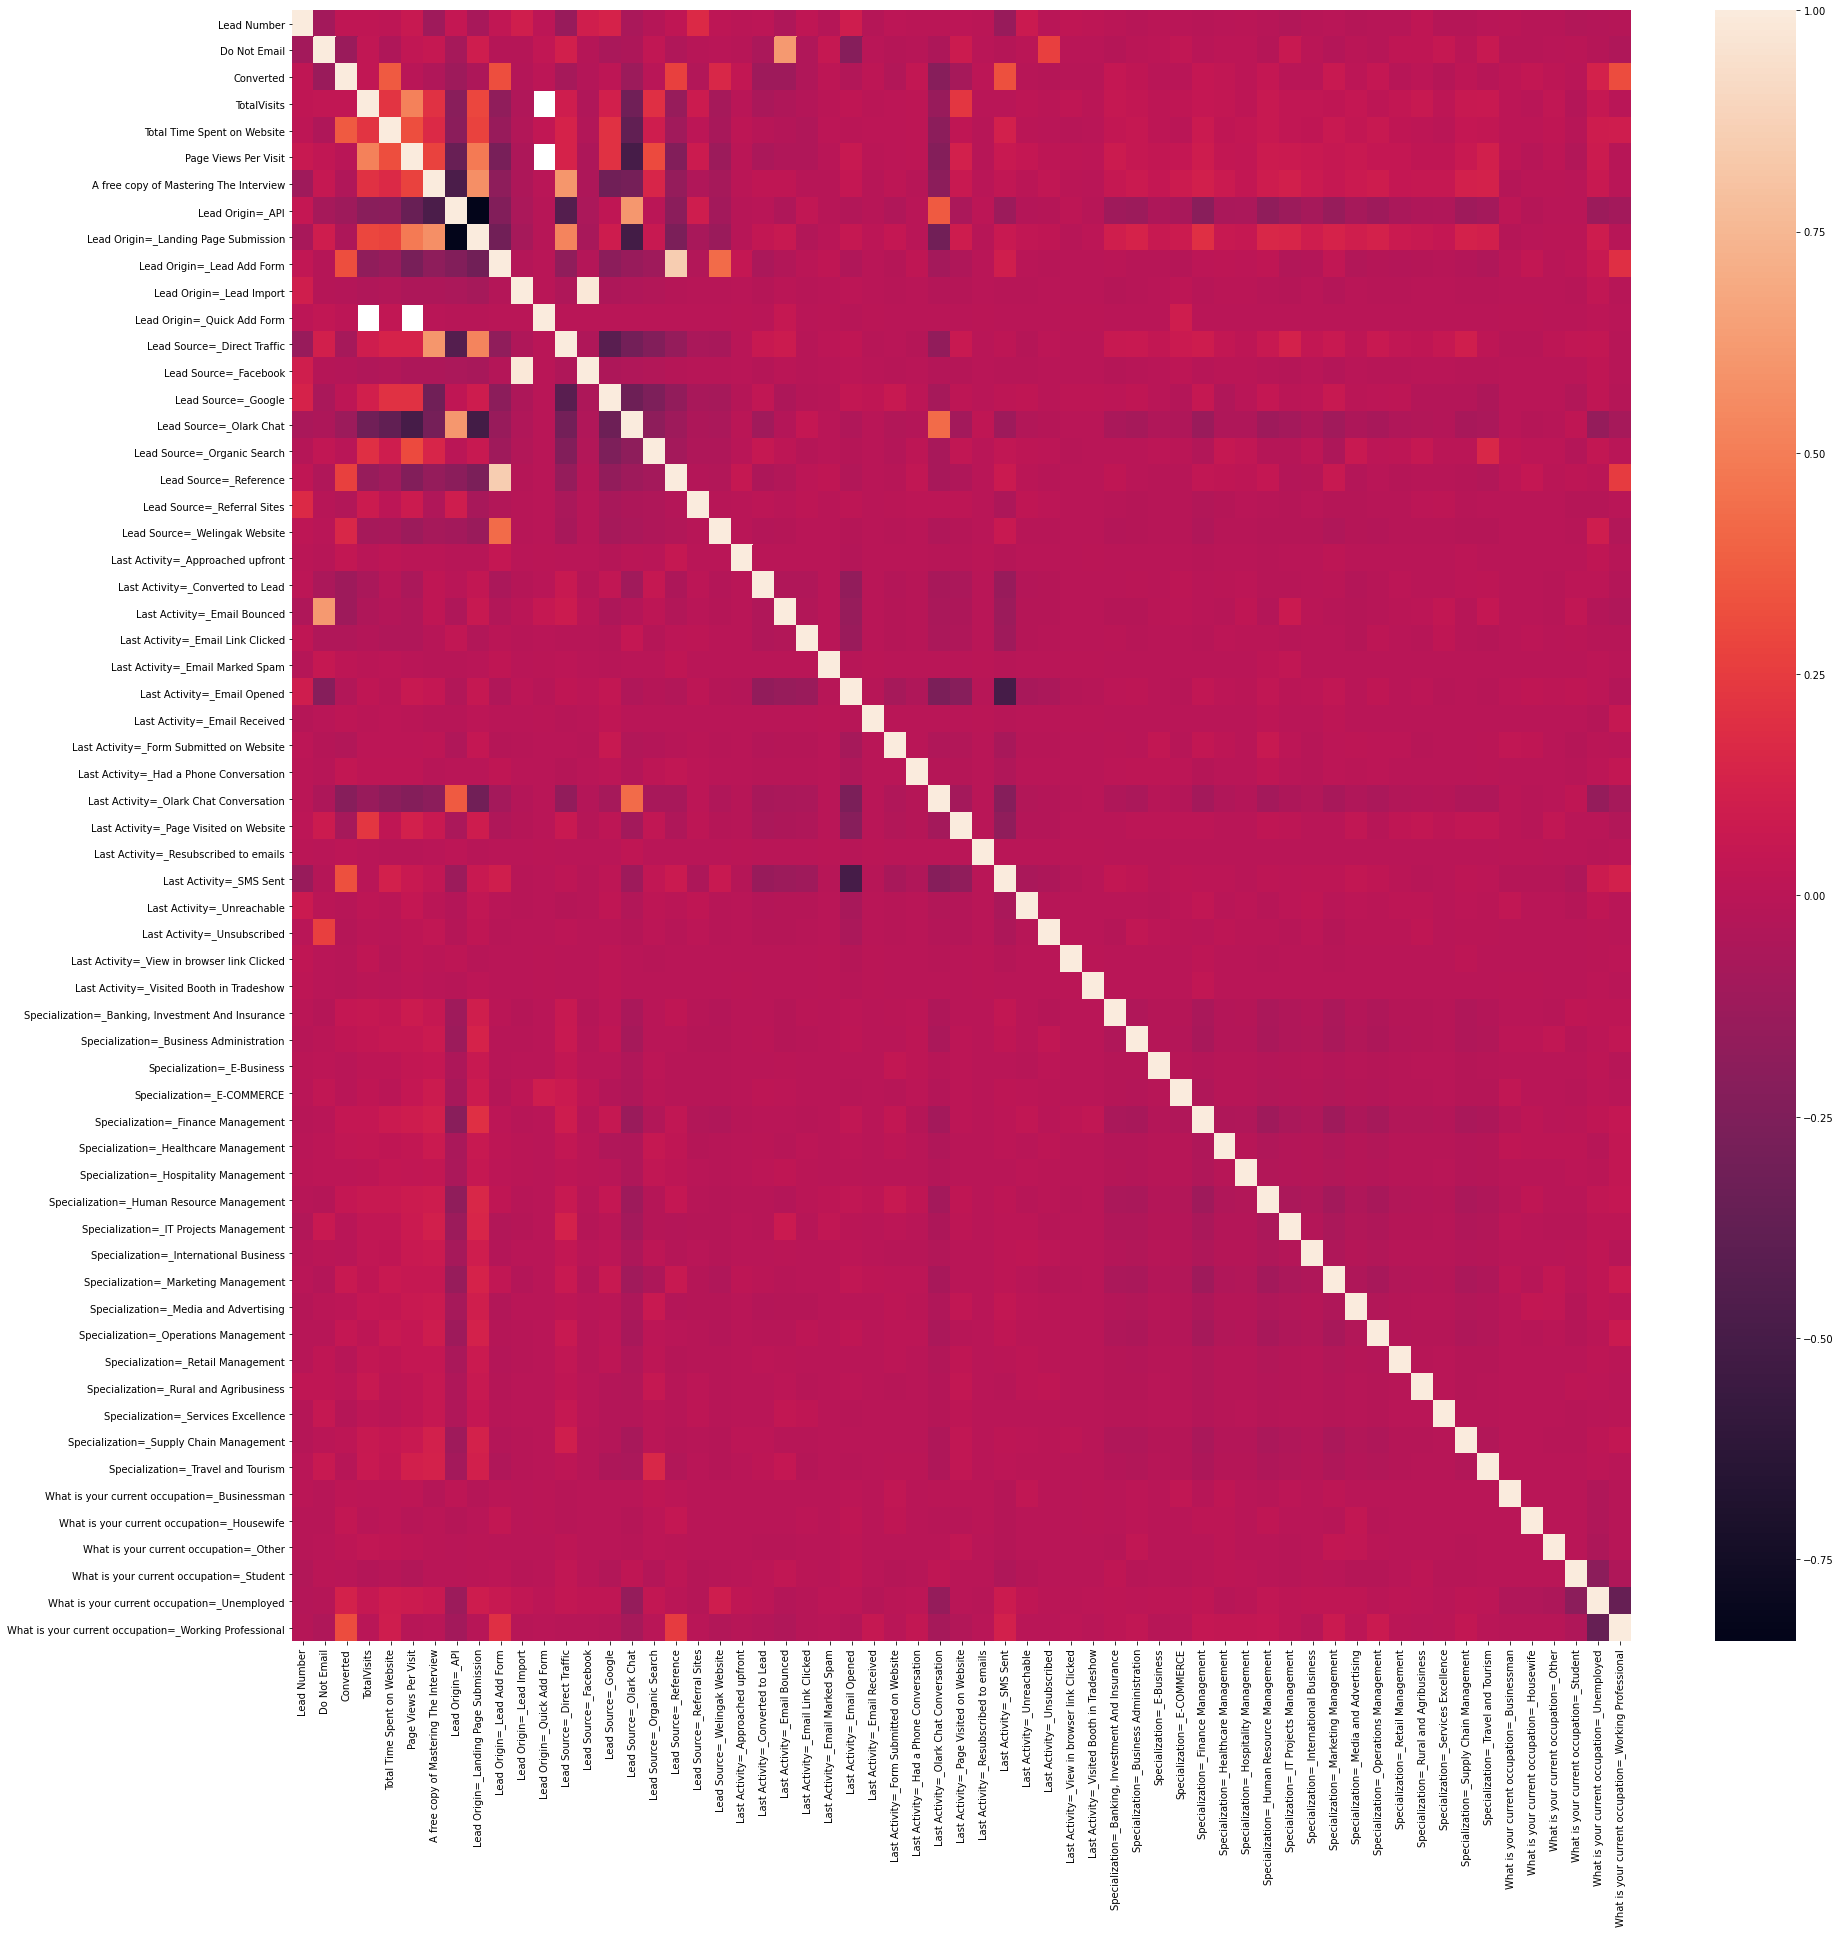

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=False)
plt.show()

In [41]:
df.isna().sum().loc[df.isna().sum()>0]

TotalVisits             137
Page Views Per Visit    137
dtype: int64

In [42]:
df = df.dropna()

## 2. Train-test split

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X = df.drop(['Prospect ID','Lead Number','Converted'],axis = 1)

In [45]:
X.columns

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Lead Origin=_API', 'Lead Origin=_Landing Page Submission',
       'Lead Origin=_Lead Add Form', 'Lead Origin=_Lead Import',
       'Lead Origin=_Quick Add Form', 'Lead Source=_Direct Traffic',
       'Lead Source=_Facebook', 'Lead Source=_Google',
       'Lead Source=_Olark Chat', 'Lead Source=_Organic Search',
       'Lead Source=_Reference', 'Lead Source=_Referral Sites',
       'Lead Source=_Welingak Website', 'Last Activity=_Approached upfront',
       'Last Activity=_Converted to Lead', 'Last Activity=_Email Bounced',
       'Last Activity=_Email Link Clicked', 'Last Activity=_Email Marked Spam',
       'Last Activity=_Email Opened', 'Last Activity=_Email Received',
       'Last Activity=_Form Submitted on Website',
       'Last Activity=_Had a Phone Conversation',
       'Last Activity=_Olark Chat Conversation',
       'Last Activit

In [46]:
y = df['Converted']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## 3. Feature Scaling

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
X_train

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin=_API,Lead Origin=_Landing Page Submission,Lead Origin=_Lead Add Form,Lead Origin=_Lead Import,Lead Origin=_Quick Add Form,...,Specialization=_Rural and Agribusiness,Specialization=_Services Excellence,Specialization=_Supply Chain Management,Specialization=_Travel and Tourism,What is your current occupation=_Businessman,What is your current occupation=_Housewife,What is your current occupation=_Other,What is your current occupation=_Student,What is your current occupation=_Unemployed,What is your current occupation=_Working Professional
7962,0,3.0,1286,1.5,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5520,0,7.0,60,7.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1962,0,5.0,169,2.5,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1566,0,14.0,1241,3.5,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9170,0,0.0,0,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,0,5.0,809,5.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82,0,0.0,0,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8173,1,4.0,1269,2.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7055,0,3.0,69,3.0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [50]:
columns_to_be_scaled = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
scaler = StandardScaler()
X_train[columns_to_be_scaled] = (scaler.fit_transform(X_train[columns_to_be_scaled]))

c:\program files (x86)\python38-32\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [51]:
X_train

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin=_API,Lead Origin=_Landing Page Submission,Lead Origin=_Lead Add Form,Lead Origin=_Lead Import,Lead Origin=_Quick Add Form,...,Specialization=_Rural and Agribusiness,Specialization=_Services Excellence,Specialization=_Supply Chain Management,Specialization=_Travel and Tourism,What is your current occupation=_Businessman,What is your current occupation=_Housewife,What is your current occupation=_Other,What is your current occupation=_Student,What is your current occupation=_Unemployed,What is your current occupation=_Working Professional
7962,0,-0.092900,1.476324,-0.394072,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5520,0,0.695064,-0.771066,2.111481,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1962,0,0.301082,-0.571257,0.061483,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1566,0,2.074000,1.393834,0.517039,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9170,0,-0.683873,-0.881052,-1.077404,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,0,0.301082,0.601932,1.200371,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82,0,-0.683873,-0.881052,-1.077404,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8173,1,0.104091,1.445161,-0.166294,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7055,0,-0.092900,-0.754568,0.289261,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [52]:
conversion_rate = y_train.sum()/len(y_train)*100
conversion_rate

37.96296296296296

## 4. Building the model

In [53]:
import statsmodels.api as sm

In [54]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

c:\program files (x86)\python38-32\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
c:\program files (x86)\python38-32\lib\site-packages\statsmodels\genmod\families\links.py:188: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
c:\program files (x86)\python38-32\lib\site-packages\statsmodels\genmod\families\family.py:947: RuntimeWarning: divide by zero encountered in log
  y * np.log(mu / (1 - mu + 1e-20)) +
c:\program files (x86)\python38-32\lib\site-packages\statsmodels\genmod\families\family.py:947: RuntimeWarning: invalid value encountered in multiply
  y * np.log(mu / (1 - mu + 1e-20)) +


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6315
Model Family:                Binomial   Df Model:                           56
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 30 Oct 2021   Deviance:                   1.5243e+05
Time:                        18:56:56   Pearson chi2:                 7.45e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                  1.847e+27   5.29e+19   3.49e+07      0.000    1.85e+27    1.85e+27
Do Not Email                                          -3.286e+14   5.45e+06  -6.03e+07      0.000   -3.29e+14   -3.29e+14
TotalVisits                                             1.09e+14   1.01e+06   1.07e+08      0.000    1.09e+14    1.09e+14
Total Time Spent on Website                            6.689e+14   9.78e+05   6.84e+08      0.000    6.69e+14    6.69e+14
Page Views Per Visit                                  -5.609e+13   1.23e+06  -4.57e+07      0.000   -5.61e+13   -5.61e+13
A free copy of Mastering The Interview                -3.099e+13   2.71e+06  -1.14e+07      0.000    -3.1e+13    -3.1e+13
Lead Origin=_API                                      -1.109e+27   3.14e+19  -3.53e+07      0.000   -1.11e+27   -1.11e+27
Lead Origin=_Landing Page Submission                  -1.109e+27   3.14e+19  -3.53e+07      0.000   -1.11e+27   -1.11e+27
Lead Origin=_Lead Add Form                            -1.109e+27   3.14e+19  -3.53e+07      0.000   -1.11e+27   -1.11e+27
Lead Origin=_Lead Import                              -1.109e+27   3.14e+19  -3.53e+07      0.000   -1.11e+27   -1.11e+27
Lead Origin=_Quick Add Form                            7.474e+24   5.05e+17   1.48e+07      0.000    7.47e+24    7.47e+24
Lead Source=_Direct Traffic                            2.669e+14   1.59e+07   1.68e+07      0.000    2.67e+14    2.67e+14
Lead Source=_Facebook                                   -8.8e+14   4.87e+07  -1.81e+07      0.000    -8.8e+14    -8.8e+14
Lead Source=_Google                                    4.133e+14   1.58e+07   2.61e+07      0.000    4.13e+14    4.13e+14
Lead Source=_Olark Chat                                5.405e+14    1.6e+07   3.38e+07      0.000    5.41e+14    5.41e+14
Lead Source=_Organic Search                            2.716e+14    1.6e+07    1.7e+07      0.000    2.72e+14    2.72e+14
Lead Source=_Reference                                -5.661e+14   1.44e+07  -3.93e+07      0.000   -5.66e+14   -5.66e+14
Lead Source=_Referral Sites                            6.132e+14   1.74e+07   3.52e+07      0.000    6.13e+14    6.13e+14
Lead Source=_Welingak Website                          4.945e+14   1.54e+07   3.22e+07      0.000    4.94e+14    4.94e+14
Last Activity=_Approached upfront                     -7.383e+26   3.38e+19  -2.18e+07      0.000   -7.38e+26   -7.38e+26
Last Activity=_Converted to Lead                      -7.383e+26   3.38e+19  -2.18e+07      0.000   -7.38e+26   -7.38e+26
Last Activity=_Email Bounced                          -7.383e+26   3.38e+19  -2.18e+07      0.000   -7.38e+26   -7.38e+26
Last Activity=_Email Link Clicked

## 5.RFE

In [55]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [56]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

c:\program files (x86)\python38-32\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
c:\program files (x86)\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\program files (x86)\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. o

In [57]:
rfe.support_

array([ True, False,  True, False, False, False, False,  True, False,
       False, False, False, False,  True, False, False, False,  True,
        True,  True, False, False, False, False, False, False,  True,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True,  True])

In [58]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 36),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 38),
 ('A free copy of Mastering The Interview', False, 41),
 ('Lead Origin=_API', False, 4),
 ('Lead Origin=_Landing Page Submission', False, 3),
 ('Lead Origin=_Lead Add Form', True, 1),
 ('Lead Origin=_Lead Import', False, 37),
 ('Lead Origin=_Quick Add Form', False, 45),
 ('Lead Source=_Direct Traffic', False, 29),
 ('Lead Source=_Facebook', False, 33),
 ('Lead Source=_Google', False, 32),
 ('Lead Source=_Olark Chat', True, 1),
 ('Lead Source=_Organic Search', False, 31),
 ('Lead Source=_Reference', False, 42),
 ('Lead Source=_Referral Sites', False, 30),
 ('Lead Source=_Welingak Website', True, 1),
 ('Last Activity=_Approached upfront', True, 1),
 ('Last Activity=_Converted to Lead', True, 1),
 ('Last Activity=_Email Bounced', False, 7),
 ('Last Activity=_Email Link Clicked', False, 11),
 ('Last Activity=_Email Marked Spam', False, 34),
 ('Last Activ

In [59]:
col = X_train.columns[rfe.support_]

In [60]:
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin=_Lead Add Form', 'Lead Source=_Olark Chat',
       'Lead Source=_Welingak Website', 'Last Activity=_Approached upfront',
       'Last Activity=_Converted to Lead',
       'Last Activity=_Had a Phone Conversation',
       'Last Activity=_Olark Chat Conversation', 'Last Activity=_SMS Sent',
       'What is your current occupation=_Housewife',
       'What is your current occupation=_Other',
       'What is your current occupation=_Student',
       'What is your current occupation=_Unemployed',
       'What is your current occupation=_Working Professional'],
      dtype='object')

In [61]:
X_train = X_train[col]
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

c:\program files (x86)\python38-32\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2607.6
Date:                Sat, 30 Oct 2021   Deviance:                       5215.3
Time:                        18:57:02   Pearson chi2:                 6.37e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                    -2.2869      0.090    -25.397      0.000      -2.463      -2.110
Do Not Email                                             -1.5281      0.164     -9.323      0.000      -1.849      -1.207
Total Time Spent on Website                               1.0975      0.040     27.393      0.000       1.019       1.176
Lead Origin=_Lead Add Form                                3.6694      0.223     16.460      0.000       3.232       4.106
Lead Source=_Olark Chat                                   1.2575      0.106     11.901      0.000       1.050       1.465
Lead Source=_Welingak Website                             1.8284      0.752      2.430      0.015       0.354       3.303
Last Activity=_Approached upfront                        22.5469   1.99e+04      0.001      0.999   -3.89e+04     3.9e+04
Last Activity=_Converted to Lead                         -1.3090      0.213     -6.153      0.000      -1.726      -0.892
Last Activity=_Had a Phone Conversation                   1.6276      0.633      2.571      0.010       0.387       2.868
Last Activity=_Olark Chat Conversation                   -1.3332      0.164     -8.146      0.000      -1.654      -1.012
Last Activity=_SMS Sent                                   1.2274      0.075     16.331      0.000       1.080       1.375
What is your current occupation=_Housewife               24.1779   1.62e+04      0.001      0.999   -3.17e+04    3.17e+04
What is your current occupation=_Other                    1.6695      0.637      2.623      0.009       0.422       2.917
What is your current occupation=_Student                  1.3427      0.241      5.568      0.000       0.870       1.815
What is your current occupation=_Unemployed               1.2105      0.088     13.826      0.000       1.039       1.382
What is your current occupation=_Working Professional     3.7530      0.198     18.974      0.000       3.365       4.141
=========================================================================================================================
"""

In [62]:
X_train= X_train.drop('What is your current occupation=_Housewife',axis=1)

In [63]:
X_train= X_train.drop('Last Activity=_Approached upfront',axis=1)

In [64]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

c:\program files (x86)\python38-32\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6358
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2621.9
Date:                Sat, 30 Oct 2021   Deviance:                       5243.9
Time:                        18:57:02   Pearson chi2:                 6.40e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                    -2.2506      0.089    -25.280      0.000      -2.425      -2.076
Do Not Email                                             -1.5360      0.164     -9.381      0.000      -1.857      -1.215
Total Time Spent on Website                               1.0988      0.040     27.491      0.000       1.020       1.177
Lead Origin=_Lead Add Form                                3.6835      0.223     16.519      0.000       3.246       4.121
Lead Source=_Olark Chat                                   1.2571      0.105     11.944      0.000       1.051       1.463
Lead Source=_Welingak Website                             1.8151      0.752      2.412      0.016       0.340       3.290
Last Activity=_Converted to Lead                         -1.3236      0.213     -6.226      0.000      -1.740      -0.907
Last Activity=_Had a Phone Conversation                   1.6152      0.633      2.552      0.011       0.375       2.856
Last Activity=_Olark Chat Conversation                   -1.3503      0.163     -8.261      0.000      -1.671      -1.030
Last Activity=_SMS Sent                                   1.2115      0.075     16.161      0.000       1.065       1.358
What is your current occupation=_Other                    1.6346      0.637      2.567      0.010       0.387       2.882
What is your current occupation=_Student                  1.3111      0.241      5.442      0.000       0.839       1.783
What is your current occupation=_Unemployed               1.1847      0.087     13.655      0.000       1.015       1.355
What is your current occupation=_Working Professional     3.7233      0.197     18.856      0.000       3.336       4.110
=========================================================================================================================
"""

In [65]:
# Make a VIF dataframe for all the variables present
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Source=_Olark Chat,1.63
11,What is your current occupation=_Unemployed,1.62
2,Lead Origin=_Lead Add Form,1.58
8,Last Activity=_SMS Sent,1.48
7,Last Activity=_Olark Chat Conversation,1.37
4,Lead Source=_Welingak Website,1.32
1,Total Time Spent on Website,1.30
12,What is your current occupation=_Working Profe...,1.20
0,Do Not Email,1.06
5,Last Activity=_Converted to Lead,1.06


## 5. Model Evaluation

In [66]:
y_train_pred = res.predict(sm.add_constant(X_train))
y_train_pred[:10]

c:\program files (x86)\python38-32\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


7962    0.854192
5520    0.128632
1962    0.381776
1566    0.952766
9170    0.315000
5097    0.123299
8954    0.489273
309     0.181796
5519    0.320819
1050    0.539796
dtype: float64

In [67]:
y_train_pred = y_train_pred.values.reshape(-1)


In [68]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.854192
1,0,0.128632
2,0,0.381776
3,1,0.952766
4,0,0.315000


In [69]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.854192,1
1,0,0.128632,0
2,0,0.381776,0
3,1,0.952766,1
4,0,0.315000,0


In [70]:
from sklearn import metrics

In [71]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3524  429]
 [ 735 1684]]


In [72]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8173258003766478


In [73]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

#### Sensitivity

In [74]:
TP/(TP+FN)

0.6961554361306325

#### Specificity

In [75]:
TN/(TN+FP)

0.8914748292436124

#### ROC Curve

In [76]:

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [77]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

In [78]:
import matplotlib.pyplot as plt

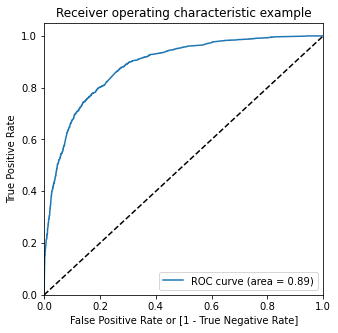

In [79]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [80]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.854192,1,1,1,1,1,1,1,1,1,1,0
1,0,0.128632,0,1,1,0,0,0,0,0,0,0,0
2,0,0.381776,0,1,1,1,1,0,0,0,0,0,0
3,1,0.952766,1,1,1,1,1,1,1,1,1,1,1
4,0,0.315000,0,1,1,1,1,0,0,0,0,0,0


In [81]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix


num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.596516  0.981397  0.360992
0.2   0.2  0.752668  0.912360  0.654946
0.3   0.3  0.784683  0.870194  0.732355
0.4   0.4  0.810421  0.761885  0.840121
0.5   0.5  0.817326  0.696155  0.891475
0.6   0.6  0.806968  0.626705  0.917278
0.7   0.7  0.783114  0.513022  0.948394
0.8   0.8  0.758161  0.412981  0.969390
0.9   0.9  0.710766  0.258371  0.987604


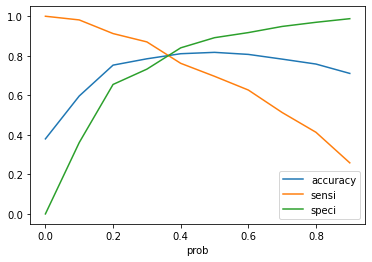

In [82]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [83]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.37 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.854192,1,1,1,1,1,1,1,1,1,1,0,1
1,0,0.128632,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.381776,0,1,1,1,1,0,0,0,0,0,0,1
3,1,0.952766,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.315000,0,1,1,1,1,0,0,0,0,0,0,0


In [84]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8066541117388575

## 6. Test set performance

In [87]:
X_test[columns_to_be_scaled] = scaler.transform((X_test[columns_to_be_scaled]))

c:\program files (x86)\python38-32\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [88]:
X_test = X_test[X_train.columns]

In [89]:
X_test

,Do Not Email,Total Time Spent on Website,Lead Origin=_Lead Add Form,Lead Source=_Olark Chat,Lead Source=_Welingak Website,Last Activity=_Converted to Lead,Last Activity=_Had a Phone Conversation,Last Activity=_Olark Chat Conversation,Last Activity=_SMS Sent,What is your current occupation=_Other,What is your current occupation=_Student,What is your current occupation=_Unemployed,What is your current occupation=_Working Professional
3504,0,-0.103815,0,0,0,0,0,0,0,0,0,1,0
4050,0,-0.881052,1,0,0,0,0,0,1,0,0,1,0
7201,1,0.424120,0,0,0,0,0,0,1,0,0,1,0
1196,0,-0.105648,0,0,0,0,0,0,0,0,0,1,0
8219,0,-0.428274,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6508,0,-0.745402,0,0,0,0,0,0,1,0,0,1,0
315,0,-0.217467,0,0,0,0,0,0,0,0,0,1,0
3766,0,-0.692242,0,0,0,0,0,0,0,0,0,0,0
8043,0,1.124367,0,1,0,0,0,0,1,0,0,1,0


In [90]:
X_test_sm = sm.add_constant(X_test)

c:\program files (x86)\python38-32\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [91]:
y_test_pred = res.predict(X_test_sm)

In [93]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [94]:
y_test_df = pd.DataFrame(y_test)

In [95]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [96]:
y_pred_final

,Converted,0
3504,0,0.235064
4050,1,0.945887
7201,0,0.284077
1196,0,0.234702
8219,1,0.177052
...,...,...
6508,0,0.337743
315,0,0.213356
3766,0,0.046922
8043,1,0.933284


In [97]:
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [98]:
y_pred_final

,Converted,Conversion_Prob
3504,0,0.235064
4050,1,0.945887
7201,0,0.284077
1196,0,0.234702
8219,1,0.177052
...,...,...
6508,0,0.337743
315,0,0.213356
3766,0,0.046922
8043,1,0.933284


In [111]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.37 else 0)

In [112]:
accuracy = (y_pred_final['Converted']==y_pred_final['final_predicted']).sum()/len(y_pred_final)

In [113]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )

In [114]:
confusion2

array([[1382,  307],
       [ 216,  826]], dtype=int64)

In [115]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [116]:
TP / float(TP+FN)

0.7927063339731286

In [117]:
TN / float(TN+FP)

0.8182356423919479

In [118]:
accuracy

0.8084950567557672

In [131]:
arr = np.arange(50).reshape(50,-1)


1